In [40]:
# Data: https://www.kaggle.com/datasets/rmisra/news-headlines-dataset-for-sarcasm-detection?resource=download

In [31]:
import json

import tensorflow as tf

In [26]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [27]:
sentences = []
labels= []
urls = []

with open("sarcasm/Sarcasm_Headlines_Dataset_v2.json", "r") as f:
    data = f.readlines()

    for line in data:
        item = json.loads(line)
        sentences.append(item["headline"])
        labels.append(item["is_sarcastic"])
        urls.append(item["article_link"])

In [28]:
training_size = 20000

training_sentences = sentences[0:training_size]
training_labels = labels[0:training_size]

test_sentences = sentences[training_size:]
test_labels = labels[training_size:]

In [29]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

traing_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(traing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [32]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [37]:
import numpy as np

num_epochs = 10
history = model.fit(
    np.array(training_padded), 
    np.array(training_labels),
    epochs=num_epochs,
    validation_data=(np.array(test_padded), np.array(test_labels)), 
    verbose=2
)

Epoch 1/10
625/625 - 3s - loss: 0.6548 - accuracy: 0.6308 - val_loss: 0.5296 - val_accuracy: 0.8098 - 3s/epoch - 5ms/step
Epoch 2/10
625/625 - 2s - loss: 0.4120 - accuracy: 0.8351 - val_loss: 0.3734 - val_accuracy: 0.8379 - 2s/epoch - 3ms/step
Epoch 3/10
625/625 - 2s - loss: 0.3074 - accuracy: 0.8769 - val_loss: 0.3398 - val_accuracy: 0.8525 - 2s/epoch - 4ms/step
Epoch 4/10
625/625 - 2s - loss: 0.2572 - accuracy: 0.9000 - val_loss: 0.3293 - val_accuracy: 0.8560 - 2s/epoch - 4ms/step
Epoch 5/10
625/625 - 2s - loss: 0.2212 - accuracy: 0.9157 - val_loss: 0.3368 - val_accuracy: 0.8551 - 2s/epoch - 4ms/step
Epoch 6/10
625/625 - 2s - loss: 0.1959 - accuracy: 0.9254 - val_loss: 0.3391 - val_accuracy: 0.8558 - 2s/epoch - 3ms/step
Epoch 7/10
625/625 - 2s - loss: 0.1755 - accuracy: 0.9344 - val_loss: 0.3495 - val_accuracy: 0.8535 - 2s/epoch - 3ms/step
Epoch 8/10
625/625 - 2s - loss: 0.1559 - accuracy: 0.9438 - val_loss: 0.3654 - val_accuracy: 0.8501 - 2s/epoch - 3ms/step
Epoch 9/10
625/625 - 2s 

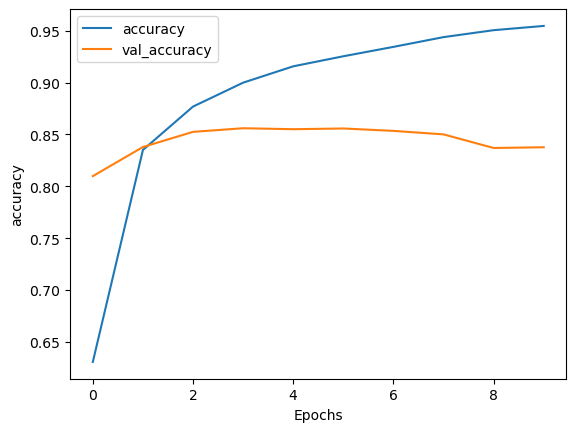

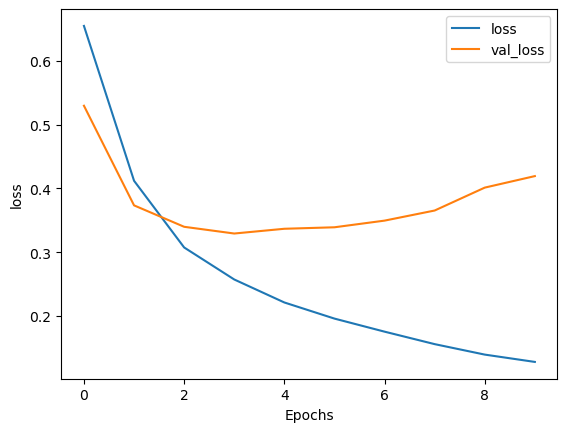

In [39]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()


plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

# LSTM

In [42]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

In [43]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 64)          640000    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 714,369
Trainable params: 714,369
Non-trainable params: 0
_________________________________________________________________


In [44]:
num_epochs = 5

history = model.fit(
    np.array(training_padded), 
    np.array(training_labels),
    epochs=num_epochs,
    validation_data=(np.array(test_padded), np.array(test_labels)), 
    verbose=2
)

Epoch 1/5
625/625 - 2s - loss: 0.1158 - accuracy: 0.9601 - val_loss: 0.4617 - val_accuracy: 0.8292 - 2s/epoch - 4ms/step
Epoch 2/5
625/625 - 2s - loss: 0.1057 - accuracy: 0.9643 - val_loss: 0.4662 - val_accuracy: 0.8335 - 2s/epoch - 4ms/step
Epoch 3/5
625/625 - 2s - loss: 0.0965 - accuracy: 0.9682 - val_loss: 0.4977 - val_accuracy: 0.8296 - 2s/epoch - 4ms/step
Epoch 4/5
625/625 - 2s - loss: 0.0871 - accuracy: 0.9706 - val_loss: 0.5187 - val_accuracy: 0.8284 - 2s/epoch - 4ms/step
Epoch 5/5
625/625 - 2s - loss: 0.0794 - accuracy: 0.9736 - val_loss: 0.5569 - val_accuracy: 0.8260 - 2s/epoch - 4ms/step


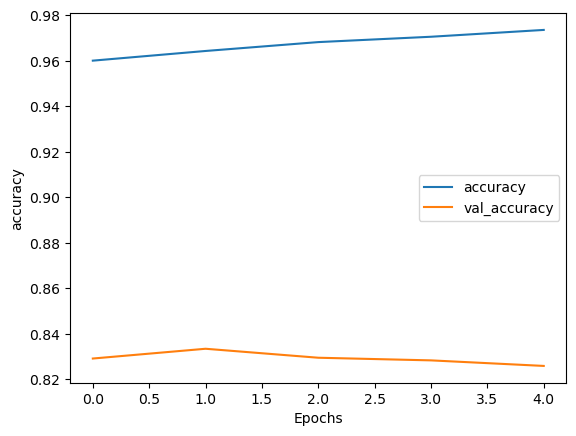

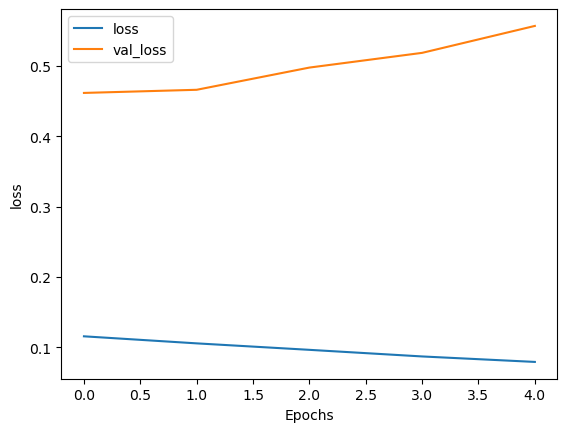

In [45]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")